#**Week 2: Exploratory Data Analysis (EDA) and Visualization**

Welcome to the first week of coding content! For this week, we'll start by just taking a look at the Heart Disease UCI dataset. Let's jump straight into it. We'll first import the data.

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/millenopan/Cardiovascular-Health-Project/blob/main/processed-cleveland.csv?raw=true'
hd = pd.read_csv(url)
hd.target = hd.target.replace({2:1, 3:1, 4:1})
#in the original dataset, 1-4 meant varying ranges of presence for heart disease: We'll just set all of them to 1 to represent heart disease.

The data has now been imported for you here, where the CSV file is stored under the variable 'hd' for 'heart-disease'. Let's take a look at it.

In [3]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


And just to check if we have any N/A values:

In [4]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

-----------------------------

At this point, we can begin exploring more of the quantitative data, and try to see if we can get anything from our data provided.

In [5]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168,4.732673,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808,1.937215,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Let's start by looking at the distribution of age for this study.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


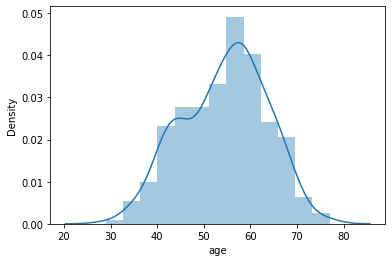

In [6]:
sns.distplot(hd['age']);

Cool! We can already see at this point that alot of the patients seem to be around their 50s. Let's try to see how age relates to the predictions of heart disease. Below is the distribution plot for patients who are predicted to have heart disease and those without.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


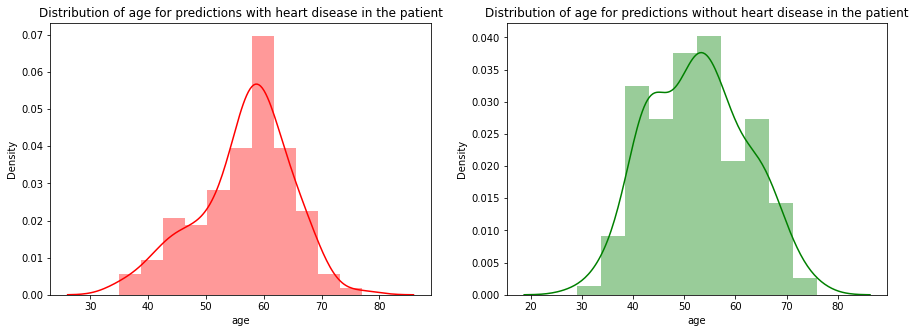

In [7]:
f= plt.figure(figsize=(15,5))
hd_p = hd[hd.target == 1] #predicted w/ heart disease
hd_np = hd[hd.target == 0] #predicted w/o heart disease

ax=f.add_subplot(121)

sns.distplot(hd_p["age"],color='r',ax=ax)
ax.set_title('Distribution of age for predictions with heart disease in the patient')

ax=f.add_subplot(122)
sns.distplot(hd_np["age"],color='g',ax=ax)
ax.set_title('Distribution of age for predictions without heart disease in the patient');

Let's take a closer look at the distributions above with their quantitative values.

In [8]:
print("Age of patients with predicted heart disease:")
hd_p["age"].describe()

Age of patients with predicted heart disease:


count    139.000000
mean      56.625899
std        7.938416
min       35.000000
25%       52.000000
50%       58.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

In [9]:
print("Age of patients without predicted heart disease:")
hd_np["age"].describe()

Age of patients without predicted heart disease:


count    164.000000
mean      52.585366
std        9.511957
min       29.000000
25%       44.750000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64

Now, let's take a look at how many patients are in each category.

In [10]:
hd['target'].value_counts()
# hd.target.value_counts() is also fine

0    164
1    139
Name: target, dtype: int64

Our data seems to pivot mostly to predicting these patients with some form of heart disease. Let's take a look at another variable: the chest pain these patients come in with. Does gender make a difference for this?

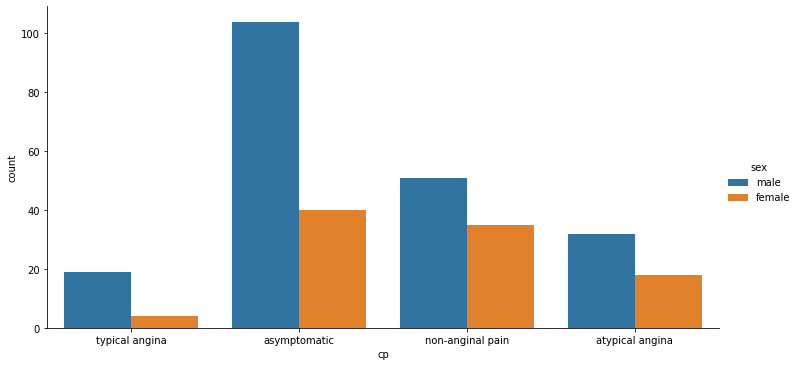

In [11]:
hd_gender = hd.copy()
hd_gender['sex'] = hd_gender['sex'].replace(0, 'female')
hd_gender['sex'] = hd_gender['sex'].replace(1, 'male')

hd_gender['cp'] = hd_gender['cp'].replace(1, 'typical angina')
hd_gender['cp'] = hd_gender['cp'].replace(2, 'atypical angina')
hd_gender['cp'] = hd_gender['cp'].replace(3, 'non-anginal pain')
hd_gender['cp'] = hd_gender['cp'].replace(4, 'asymptomatic')

sns.catplot(x="cp", kind="count", hue = 'sex', aspect=2, data=hd_gender);

This graph helps us see the counts we get, but it might be misleading if our data does not have a good ratio of male and female patients. It might only be useful for us to extrapolate by visually comparing each type of chest pain within each gender rather than looking at each type of chest pain based on gender. Let's take a look at our data for the ratio.

In [12]:
hd_gender['sex'].value_counts()

male      206
female     97
Name: sex, dtype: int64

It seems like the patients in this study have more than twice as many males than females, making our graph above a bit difficult to use properly. If you wanted to actually showcase a graph with better information, you might want to try and find the percentage based amounts scaled towards each gender!

Finally, let's take a peak at how many patients at different ages likely have heart disease.

In [13]:
young_ppl = hd[(hd['age'] < 40)]
young_ratio = young_ppl['target'].value_counts(normalize=True)*100
print("Percentage of patients under 40 predicted with no heart disease: " + str(round(young_ratio[0], 2)))
print("Percentage of patients under 40 predicted with heart disease: " + str(round(young_ratio[1], 2)) + '\n')



older_ppl = hd[hd['age'] > 65]
older_ratio = older_ppl['target'].value_counts(normalize=True)*100
print("Percentage of patients over 65 predicted with no heart disease: " + str(round(older_ratio[0], 2)))
print("Percentage of patients over 65 predicted with heart disease: " + str(round(older_ratio[1], 2)))

Percentage of patients under 40 predicted with no heart disease: 73.33
Percentage of patients under 40 predicted with heart disease: 26.67

Percentage of patients over 65 predicted with no heart disease: 51.52
Percentage of patients over 65 predicted with heart disease: 48.48


This is a good point to pause and consider what the data means in this case. Although we might not be able to easily jump to conclusions, the data does seem to imply that most older patients seem to be more likely to have a heart disease than younger individuals. Does the information we've extrapolated make sense in the context of our data? It is crucial to keep this question in mind as you explore to make sure that errors in your code do not lead to misconceptions, and keeping the mantra "correlation does not imply causation" with you as well. 